In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-02-10 12:33:16.028503: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-02-10 12:33:18.034151: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA A40 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 84 deviceMemorySize: 44.56GiB deviceMemoryBandwidth: 648.29GiB/s
2022-02-10 12:33:18.034636: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-02-10 12:33:18.036564: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-02-10 12:33:18.038530: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-02-10 12:33:18.038978: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-0

In [2]:
stream = "mock"

In [3]:
df, file = load_file(stream = stream)

### Prepare datasets for training

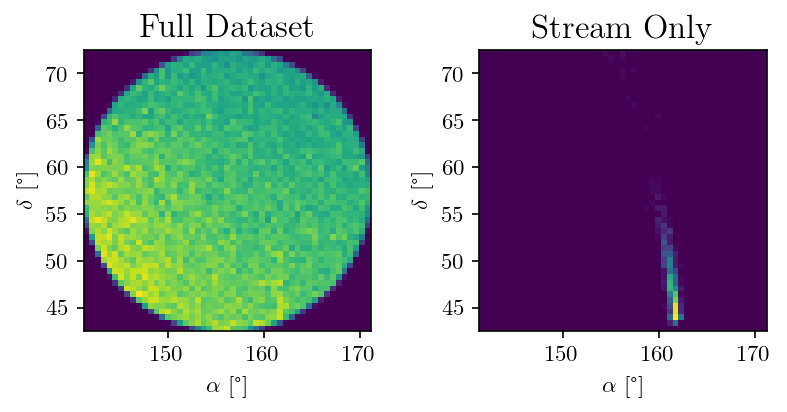

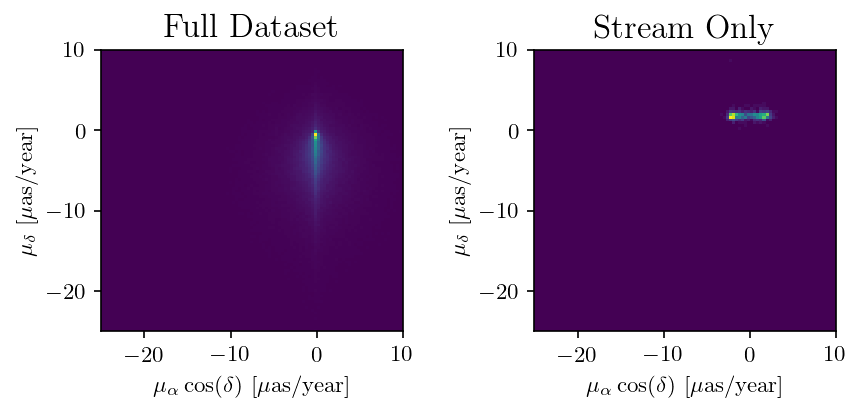

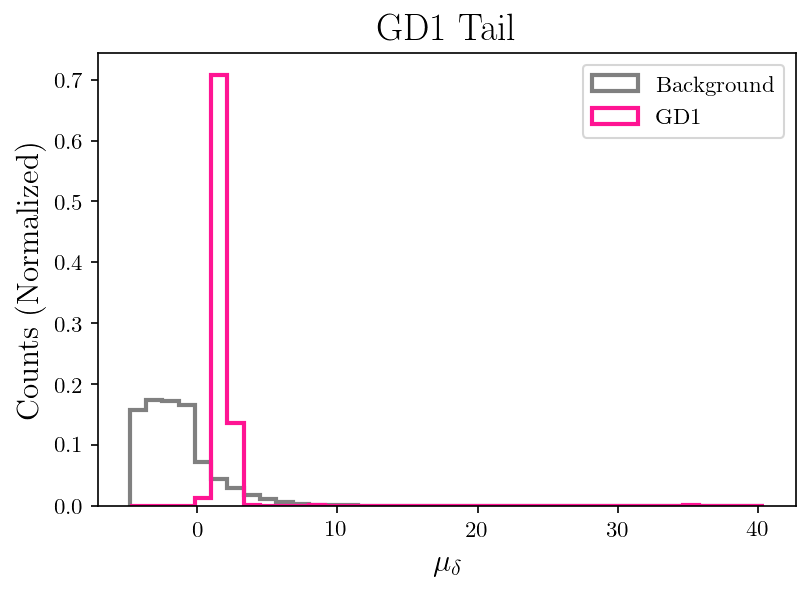

In [4]:
visualize_stream(df, save_folder="mock")

Sideband region: [1.3,2.6]
Signal region: [1.6,2.3]
Total counts: SR = 7,321, SB = 6,943


/clusterfs/ml4hep/mpettee/GaiaCWoLa/notebooks/../python/functions.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)
No handles with labels found to put in legend.


Signal region has 495 stream and 6,826 bkg events (7.25%).
Sideband region has 139 stream and 6,804 bkg events (2.04%).
f_sig = 3.5X f_sideband.


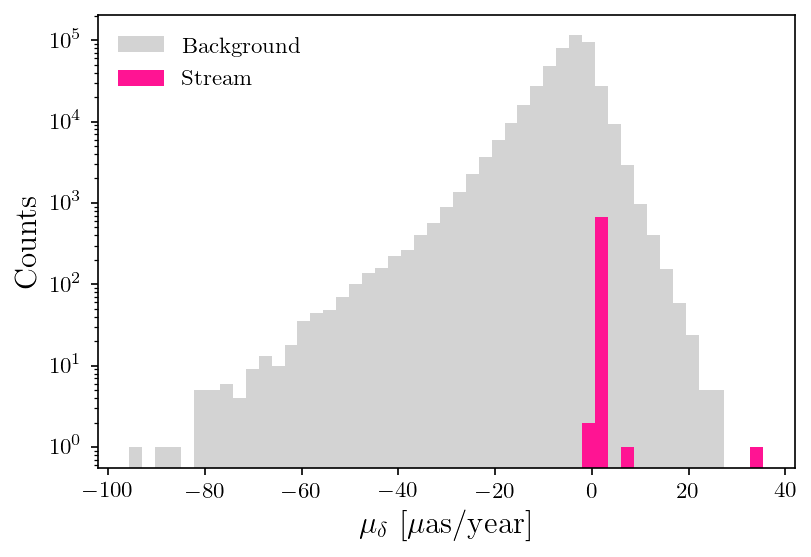

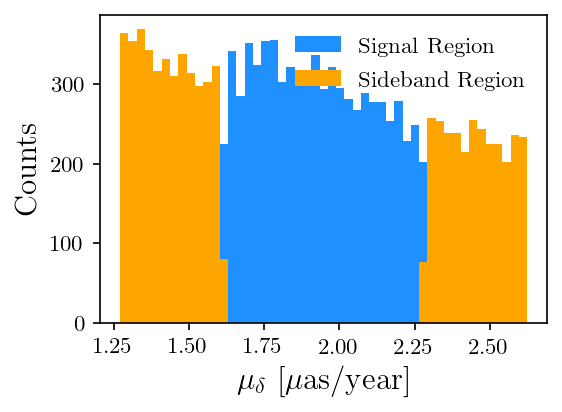

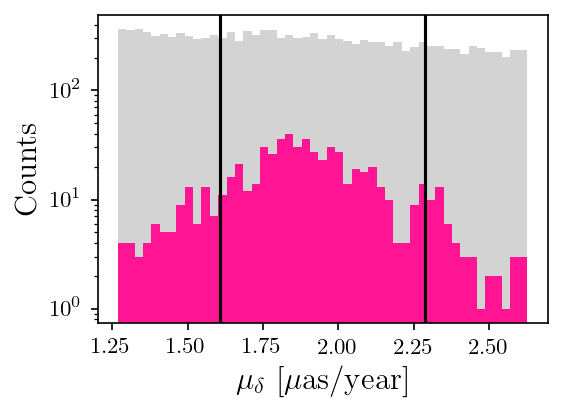

In [5]:
df = signal_sideband(df, stream = stream, save_folder = "mock")

# Train

In [6]:
tf.keras.backend.clear_session()

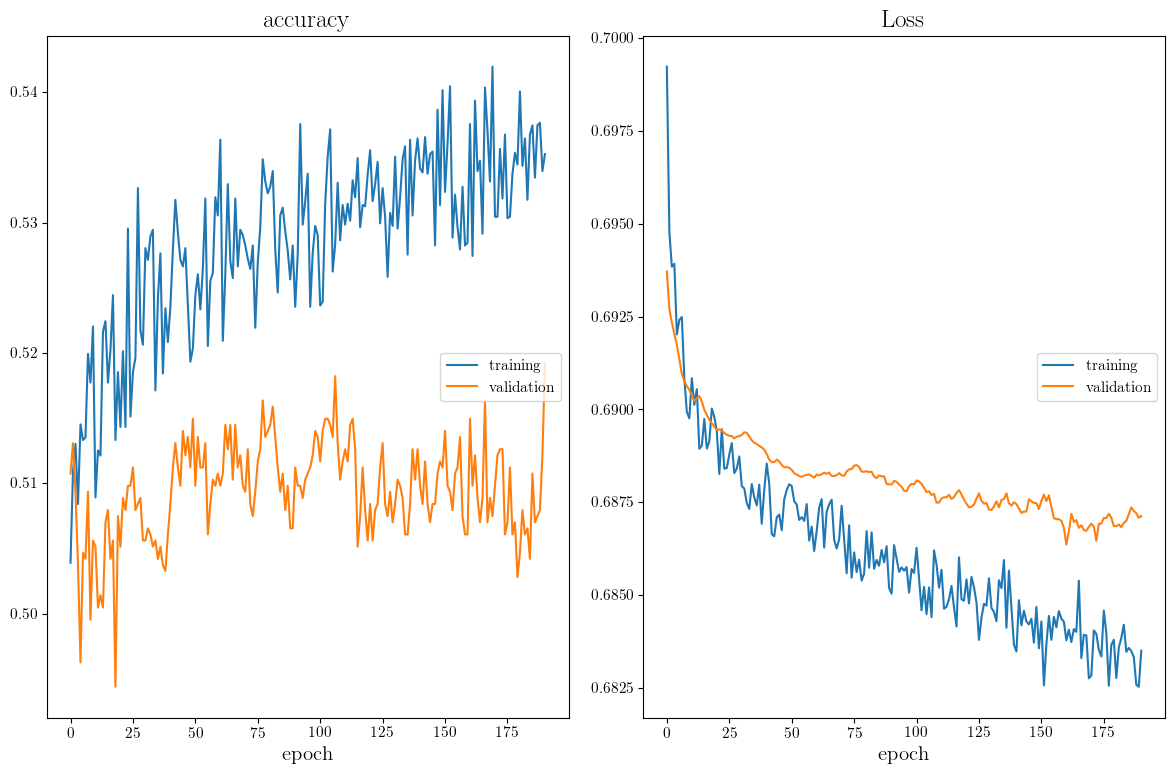

accuracy
	training         	 (min:    0.504, max:    0.542, cur:    0.535)
	validation       	 (min:    0.494, max:    0.519, cur:    0.519)
Loss
	training         	 (min:    0.683, max:    0.699, cur:    0.683)
	validation       	 (min:    0.686, max:    0.694, cur:    0.687)
Best losses: [0.6825264096260071]
Loading weights from best loop, i.e. loop #0.
AUC: 0.521
Maximum purity of 100.0% at 0.01%
Top 10 stars: Purity = 100.0% 
Top 20 stars: Purity = 100.0% 
Top 50 stars: Purity = 98.0% 
Top 100 stars: Purity = 67.0% 


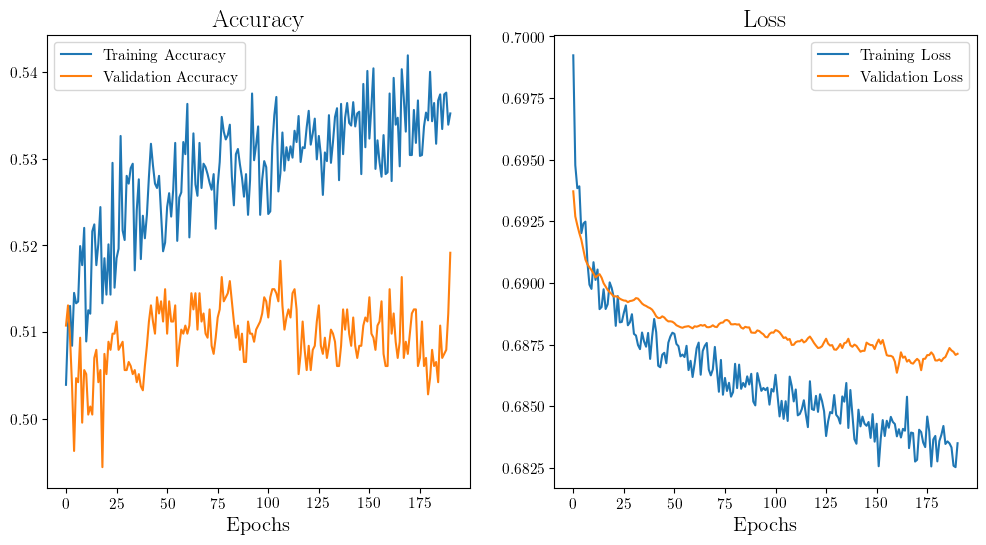

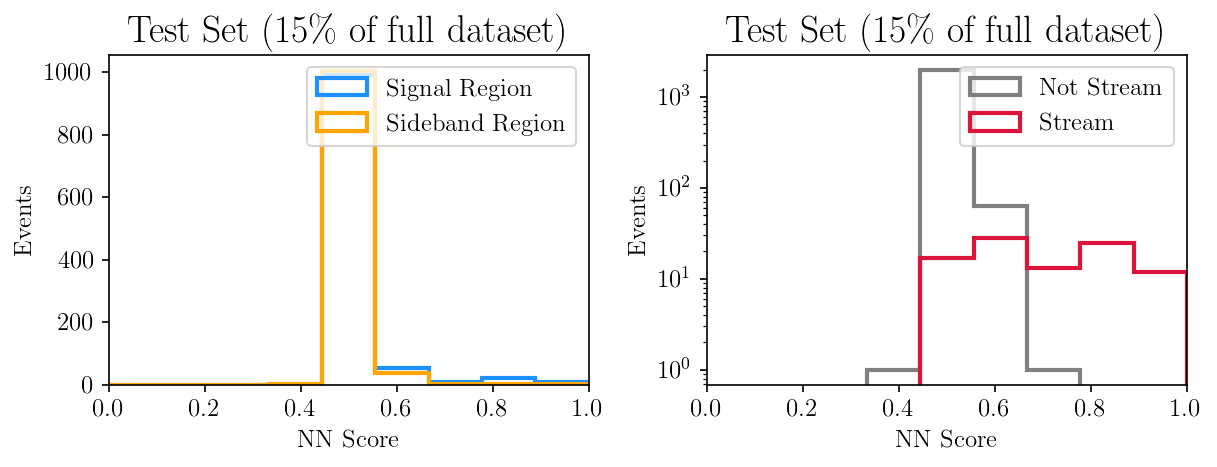

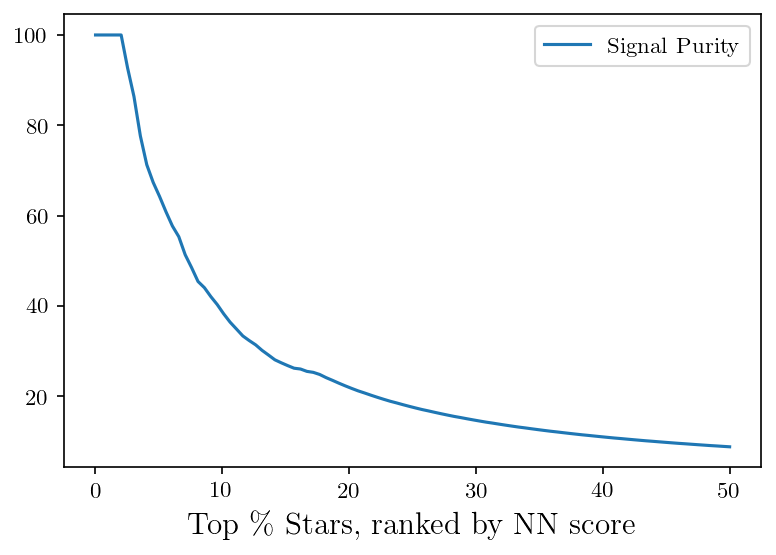

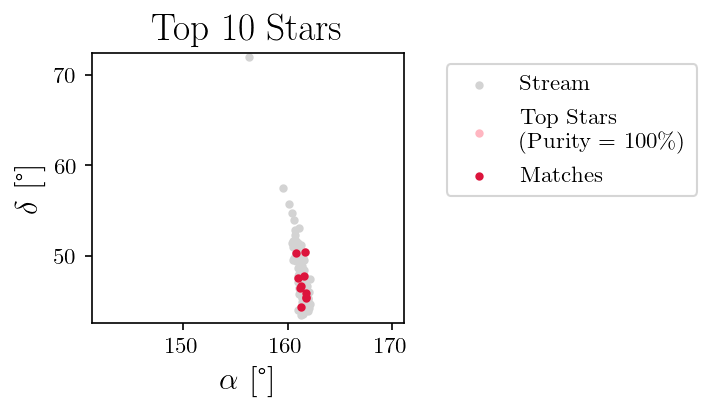

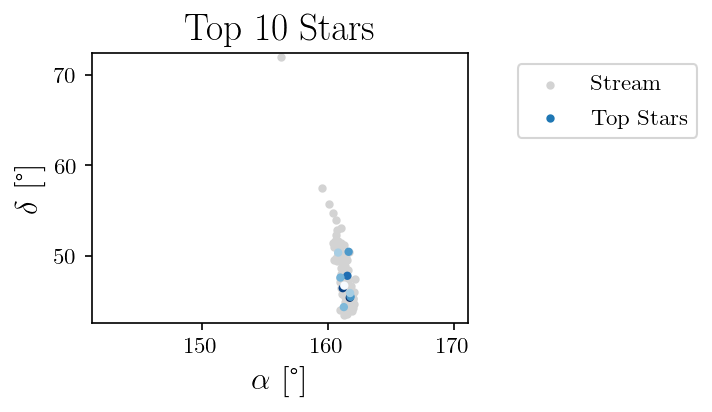

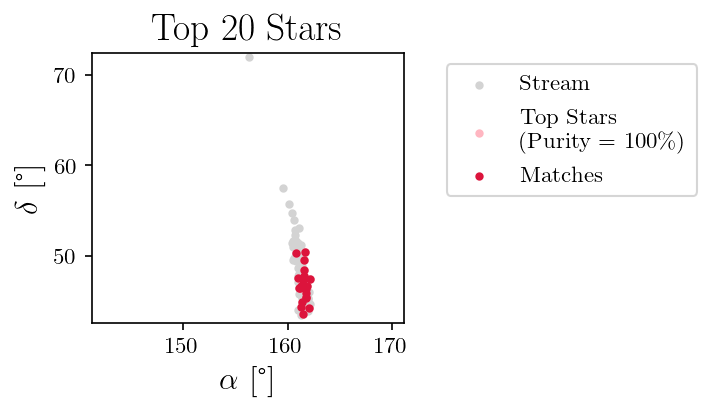

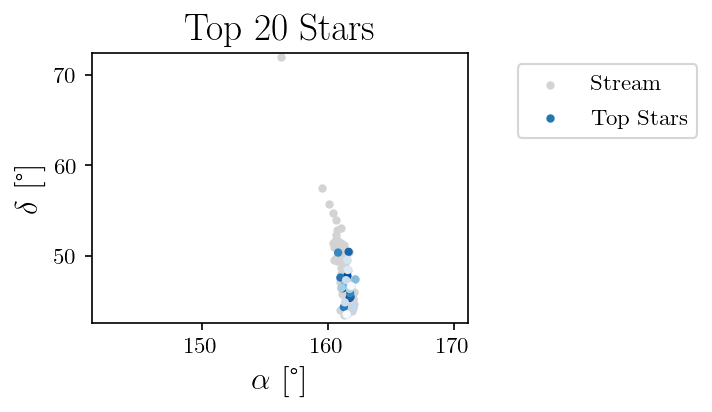

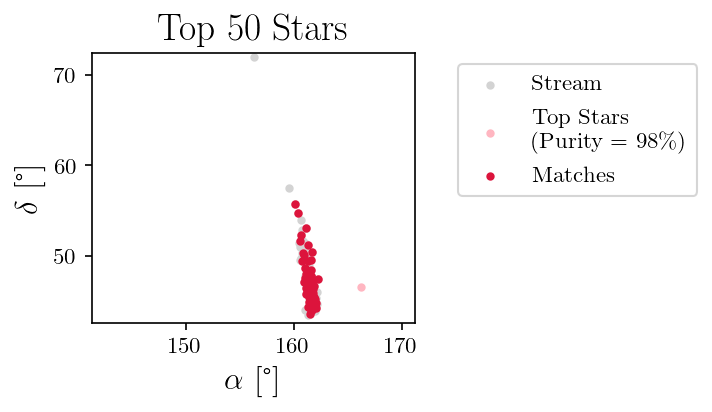

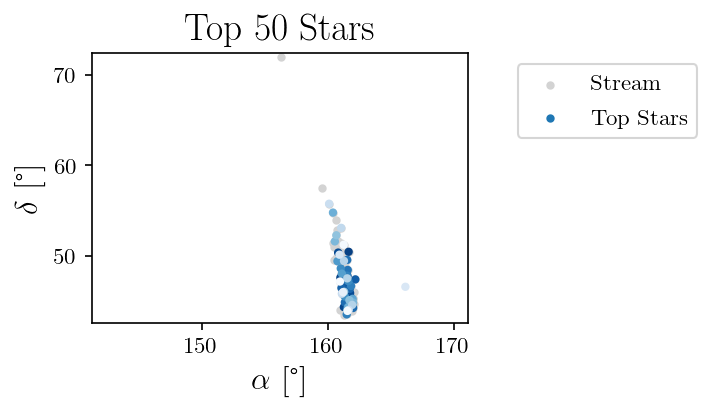

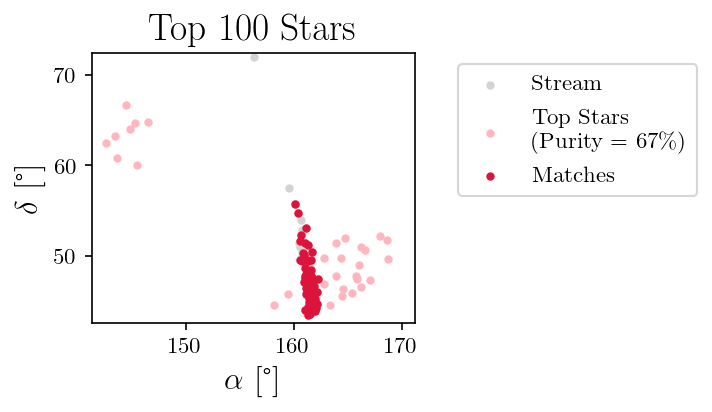

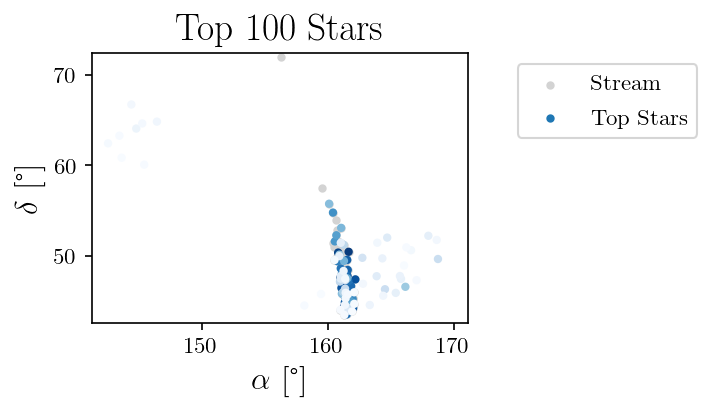

In [7]:
test = train(df, 
      save_folder = "mock",
      n_folds = 1, 
      best_of_n_loops = 1,
      layer_size = 32, 
      batch_size = 1000, 
      dropout = 0.2, 
      epochs = 2000, 
      patience = 30)